# Preliminary Strain Calculations in the LIT-PCBA Dataset

* Protein: Opioid Kappa Receptor 1
* PDB: 67B3
* Protein Preparation: Default
* Grid: Default 
* Ligands: Full Dataset
* Ligand Preparation: DD Prep. LIT-PCBA ligands (*.smi) have partially enumerated stereochemistry and protomers. I assigned unenumerated stereocenters and did not change initial protonation. 
* Docking: Glide (default) 

In [23]:
import pickle 
import pandas as pd

with open('final.pkl', 'rb') as f:
    inactive = pickle.load(f)

inactive.head()

,Title,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_ionizer_Ion_state_n,i_ionizer_Tot_Q,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,b_lp_Chiralities_Consistent,r_i_docking_score,r_i_glide_ecoul,r_i_glide_eff_state_penalty,r_i_glide_einternal,r_i_glide_emodel,r_i_glide_energy,r_i_glide_erotb,r_i_glide_esite,r_i_glide_evdw,r_i_glide_gscore,r_i_glide_hbond,r_i_glide_ligand_efficiency,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_metal,r_i_glide_rewards,r_ionizer_Ionization_penalty,r_ionizer_Ionization_penalty_charging,r_ionizer_Ionization_penalty_neutral,r_lp_Energy,r_lp_tautomer_probability,s_i_glide_gridfile,s_ionizer_Ion_centers,s_ionizer_Ion_ctrs_in,s_ionizer_Ion_types,s_lp_Force_Field,s_lp_Variant,s_m_source_file
0,24784061_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x401e823e0>,0,375,212284,293,15,0,0,58128,208546,0,1,-10.9274,-9.67387,0,18.40270,-114.3210,-70.4210,0.740076,-0.027990,-60.7472,-10.9274,-1.590970,-0.266521,-2.31828,-0.919024,-4.58671,0,-0.973345,0.0089,0.0000,0.0089,28.8180,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,24784061_Isomer1-1,inactives_enumerated.smi
1,49733857_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3db832430>,0,522,30877,49,16,0,0,58128,30087,0,1,-10.7609,-11.60610,0,7.79451,-112.3860,-70.9854,0.919806,-0.102207,-59.3793,-10.7609,-1.175790,-0.269022,-2.29498,-0.920044,-4.45166,0,-1.241160,0.1986,0.0000,0.1986,24.5700,0.500000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,49733857_Isomer1-1,inactives_enumerated.smi
2,26671073_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x3db832480>,0,309,123773,64,13,0,0,58128,121271,0,1,-10.6693,-21.91360,0,12.06320,-102.7670,-64.1163,1.061530,-0.295374,-42.2028,-10.6693,-1.252490,-0.355644,-2.42418,-1.105070,-3.28749,0,-1.498310,0.0000,0.0000,0.0000,12.5578,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,26671073_Isomer1-1,inactives_enumerated.smi
3,47201060_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x401e82520>,0,31,104347,138,8,0,0,58128,102156,0,1,-10.6551,-23.67670,0,16.71140,-95.9564,-65.8663,0.941195,0.000000,-42.1895,-10.6551,-0.805985,-0.409812,-2.50232,-1.214070,-2.85242,0,-2.276920,0.0030,0.0000,0.0030,33.8309,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,47201060_Isomer1-1,inactives_enumerated.smi
4,49820069_Isomer1,<rdkit.Chem.rdchem.Mol object at 0x401e825c0>,0,168,17861,229,12,0,0,58128,17320,0,1,-10.4337,-14.21080,0,4.73343,-105.0500,-69.9499,0.719637,-0.020861,-55.7391,-10.4337,-1.387260,-0.274571,-2.24981,-0.923099,-3.07786,0,-1.748770,0.0000,0.0000,0.0000,37.1524,0.572915,glide-grid_67B3_PL_Complex,,,,OPLS_2005,49820069_Isomer1-1,inactives_enumerated.smi


In [24]:
pd.set_option("display.max_columns", None)

# Find duplicates in the inactive dataframe by 'Title'
duplicateRowsDF = inactive[inactive.duplicated(["Title"])]

# Sort the duplicate dataframe by 'Title'
duplicateRowsDF.sort_values(by=["Title"], inplace=True)
duplicateRowsDF

# Find all duplicates in the inactive dataframe by 'Title'
all_duplicate_rows = inactive[inactive.duplicated(["Title"], keep=False)]

# Get a list of unique titles that have duplicates
duplicate_titles = all_duplicate_rows["Title"].unique()

# Get the first duplicate title
first_duplicate_title = duplicate_titles[0]

# Filter the inactive dataframe to only include rows with the first duplicate title
first_duplicate_df = inactive[inactive["Title"] == first_duplicate_title]
first_duplicate_df

# Filter the dataframe to only include columns where the values in the first two rows are not equal
different_df = first_duplicate_df.loc[
    :, first_duplicate_df.iloc[0] != first_duplicate_df.iloc[1]
]
different_df

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_15107/299109784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicateRowsDF.sort_values(by=["Title"], inplace=True)


,Mol,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_ionizer_Ion_state_n,i_ionizer_Tot_Q,r_i_docking_score,r_i_glide_ecoul,r_i_glide_einternal,r_i_glide_emodel,r_i_glide_energy,r_i_glide_erotb,r_i_glide_esite,r_i_glide_evdw,r_i_glide_gscore,r_i_glide_hbond,r_i_glide_ligand_efficiency,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_rewards,r_ionizer_Ionization_penalty_charging,r_ionizer_Ionization_penalty_neutral,r_lp_Energy,s_ionizer_Ion_centers,s_ionizer_Ion_ctrs_in,s_ionizer_Ion_types,s_lp_Variant
9,<rdkit.Chem.rdchem.Mol object at 0x401e827f0>,48,5504,53,1,1,-10.29170,-7.82813,23.31730,-93.1324,-70.8110,0.302839,0.000000,-62.9829,-10.29170,-0.026667,-0.233902,-2.15118,-0.825755,-4.83157,-1.41291,0.4107,0.0000,62.8531,79,35,N5,49828305_Isomer1-2
957,<rdkit.Chem.rdchem.Mol object at 0x401e92cf0>,88,5503,288,0,0,-8.79733,-6.15690,9.96385,-87.7840,-62.1296,0.304994,-0.004628,-55.9727,-8.79733,-0.160000,-0.199939,-1.83883,-0.705855,-4.18857,-1.02695,0.0000,0.4107,72.2700,,,,49828305_Isomer1-1


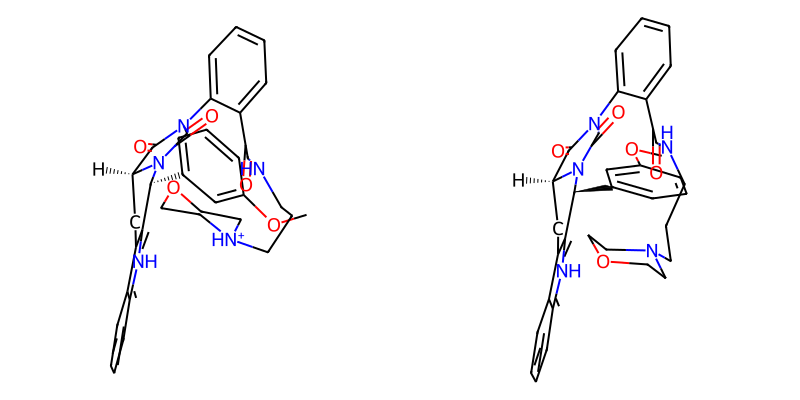

In [25]:
from rdkit.Chem import Draw

# Get the Mol objects from the 'Mol' column
mols = first_duplicate_df['Mol'].tolist()

# Draw the Mol objects in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400, 400))  # Adjust molsPerRow and subImgSize as needed
img

In [26]:
# Define a function that appends the value in the 'i_ionizer_Ion_state_n' column to the 'Title' column
def append_ion_state(row):
    return f"{row['Title']}_{row['i_ionizer_Ion_state_n']}"

# Apply the function to each row of the inactive dataframe
inactive['Title'] = inactive.apply(append_ion_state, axis=1)
inactive

,Title,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_ionizer_Ion_state_n,i_ionizer_Tot_Q,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,b_lp_Chiralities_Consistent,r_i_docking_score,r_i_glide_ecoul,r_i_glide_eff_state_penalty,r_i_glide_einternal,r_i_glide_emodel,r_i_glide_energy,r_i_glide_erotb,r_i_glide_esite,r_i_glide_evdw,r_i_glide_gscore,r_i_glide_hbond,r_i_glide_ligand_efficiency,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_metal,r_i_glide_rewards,r_ionizer_Ionization_penalty,r_ionizer_Ionization_penalty_charging,r_ionizer_Ionization_penalty_neutral,r_lp_Energy,r_lp_tautomer_probability,s_i_glide_gridfile,s_ionizer_Ion_centers,s_ionizer_Ion_ctrs_in,s_ionizer_Ion_types,s_lp_Force_Field,s_lp_Variant,s_m_source_file
0,24784061_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x401e823e0>,0,375,212284,293,15,0,0,58128,208546,0,1,-10.92740,-9.67387,0,18.402700,-114.3210,-70.4210,0.740076,-0.027990,-60.7472,-10.92740,-1.590970,-0.266521,-2.31828,-0.919024,-4.58671,0,-0.973345,0.0089,0.0000,0.0089,28.8180,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,24784061_Isomer1-1,inactives_enumerated.smi
1,49733857_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x3db832430>,0,522,30877,49,16,0,0,58128,30087,0,1,-10.76090,-11.60610,0,7.794510,-112.3860,-70.9854,0.919806,-0.102207,-59.3793,-10.76090,-1.175790,-0.269022,-2.29498,-0.920044,-4.45166,0,-1.241160,0.1986,0.0000,0.1986,24.5700,0.500000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,49733857_Isomer1-1,inactives_enumerated.smi
2,26671073_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x3db832480>,0,309,123773,64,13,0,0,58128,121271,0,1,-10.66930,-21.91360,0,12.063200,-102.7670,-64.1163,1.061530,-0.295374,-42.2028,-10.66930,-1.252490,-0.355644,-2.42418,-1.105070,-3.28749,0,-1.498310,0.0000,0.0000,0.0000,12.5578,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,26671073_Isomer1-1,inactives_enumerated.smi
3,47201060_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x401e82520>,0,31,104347,138,8,0,0,58128,102156,0,1,-10.65510,-23.67670,0,16.711400,-95.9564,-65.8663,0.941195,0.000000,-42.1895,-10.65510,-0.805985,-0.409812,-2.50232,-1.214070,-2.85242,0,-2.276920,0.0030,0.0000,0.0030,33.8309,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,47201060_Isomer1-1,inactives_enumerated.smi
4,49820069_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x401e825c0>,0,168,17861,229,12,0,0,58128,17320,0,1,-10.43370,-14.21080,0,4.733430,-105.0500,-69.9499,0.719637,-0.020861,-55.7391,-10.43370,-1.387260,-0.274571,-2.24981,-0.923099,-3.07786,0,-1.748770,0.0000,0.0000,0.0000,37.1524,0.572915,glide-grid_67B3_PL_Complex,,,,OPLS_2005,49820069_Isomer1-1,inactives_enumerated.smi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42332,7972607_Isomer1_0,<rdkit.Chem.rdchem.Mol object at 0x531ea67f0>,0,78,119057,343,8,0,0,58128,327264,0,1,-5.63405,-3.91201,0,2.037260,-56.8893,-42.6091,1.134950,0.000000,-38.6971,-5.63405,-0.287719,-0.244959,-1.36236,-0.696630,-2.00784,0,-1.951780,0.0000,0.0000,0.0000,27.5064,1.000000,glide-grid_67B3_PL_Complex,,,,OPLS_2005,7972607_Isomer1-1,inactives_enumerated.smi
42333,4254607_Isomer12_1,<rdkit.Chem.rdchem.Mol object at 0x531ea6840>,0,4,147876,134,5,1,-1,58128,355514,0,1,-5.63405,-4.11104,0,0.964136,-46.9706,-35.7003,0.672607,0.000000,-31.5893,-5.63405,-0.160000,-0.268288,-1.39301,-0.740186,-1.89358,0,-2.056950,0.0002,0.0002,0.0000,66.3607,1.000000,glide-grid_67B3_PL_Complex,39,5,OM,OPLS_2005,4254607_Isomer12-1,inactives_enumerated.smi
42334,4254607_Isomer16_1,<rdkit.Chem.rdchem.Mol object at 0x531ea6890>,0,4,147880,134,5,1,-1,58128,355518,2,0,-5.63405,-4.11104,0,0.964136,-46.9706,-35.7003,0.672607,0.000000,-31.5893,-5.63405,-0.160000,-0.268288,-1.39301,-0.740186,-1.89358,0,-2.056950,0.0002,0.0002,0.0000,66.3340,1.000000,glide-grid_67B3_PL_Complex,39,5,OM,OPLS_2005,4254607_Isomer16-1,inactives_en

In [27]:
# Find duplicates in the inactive dataframe by 'Title'
duplicateRowsDF = inactive[inactive.duplicated(["Title"])]

# Sort the duplicate dataframe by 'Title'
duplicateRowsDF.sort_values(by=["Title"], inplace=True)
duplicateRowsDF

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_15107/1493837802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicateRowsDF.sort_values(by=["Title"], inplace=True)


,Title,Mol,Activity,i_i_glide_confnum,i_i_glide_lignum,i_i_glide_posenum,i_i_glide_rotatable_bonds,i_ionizer_Ion_state_n,i_ionizer_Tot_Q,i_lp_mmshare_version,i_m_source_file_index,i_f3d_flags,b_lp_Chiralities_Consistent,r_i_docking_score,r_i_glide_ecoul,r_i_glide_eff_state_penalty,r_i_glide_einternal,r_i_glide_emodel,r_i_glide_energy,r_i_glide_erotb,r_i_glide_esite,r_i_glide_evdw,r_i_glide_gscore,r_i_glide_hbond,r_i_glide_ligand_efficiency,r_i_glide_ligand_efficiency_ln,r_i_glide_ligand_efficiency_sa,r_i_glide_lipo,r_i_glide_metal,r_i_glide_rewards,r_ionizer_Ionization_penalty,r_ionizer_Ionization_penalty_charging,r_ionizer_Ionization_penalty_neutral,r_lp_Energy,r_lp_tautomer_probability,s_i_glide_gridfile,s_ionizer_Ion_centers,s_ionizer_Ion_ctrs_in,s_ionizer_Ion_types,s_lp_Force_Field,s_lp_Variant,s_m_source_file


All duplicates seem to because of different charge states, despite explicit commands in Schrodinger to NOT ionize. 

This is very frustrating. At the very least, you think Schrodinger would append a name to the title to reflect that it is a different molecule. 

We can't really do anything but (1) make Schrodinger actually obey the command, (2) make Schrodinger update a unique identifier for the molecule, (3) write new SDFs in rdkit by re-exporting the df to sdf, recomputing the strain energies, and then 